# ¡Hola, Andres!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# Estrategia de interacción con clientes basada en datos analíticos: caso gimnasios Model Fitness

## Descripción del proyecto
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Tienes que:

Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
Analizar los factores que más impactan la pérdida.
Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
identificar a los grupos objetivo;
sugerir medidas para reducir la rotación;
describir cualquier otro patrón que observes con respecto a la interacción con los clientes.
Instrucciones para completar el proyecto



## Paso 1. Descargar los datos
Model Fitness te aportó archivos CSV que contienen los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía. El dataset incluye los siguientes campos:

-'Churn' — la cancelación para el mes en cuestión

Campos de dataset actuales:

Datos del usuario del mes anterior
- 'gender'.
- 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
- 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
- Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
- 'Phone' — si el/la usuario/a aportó el número de teléfono.
- 'Age'.
- 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.

Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:
- 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
- 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
- 'Group_visits' — si el/la usuario/a participa en sesiones grupales.
- 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
- 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
- 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

Ruta de archivo: /datasets/gym_churn_us.csv. Descargar el dataset. 

### Importación de librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

### Lectura de datos

In [2]:
data = pd.read_csv('/datasets/gym_churn_us.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías.
</div>

In [3]:
# cambio a minúsculas todos los nombres de columna
new_colnames = []
for name in data.columns:
    new = name.lower()
    new_colnames.append(new)
data.columns = new_colnames
print(data)

      gender  near_location  partner  promo_friends  phone  contract_period  \
0          1              1        1              1      0                6   
1          0              1        0              0      1               12   
2          0              1        1              0      1                1   
3          0              1        1              1      1               12   
4          1              1        1              1      1                1   
...      ...            ...      ...            ...    ...              ...   
3995       1              1        1              0      1               12   
3996       0              1        0              0      1                1   
3997       1              1        1              1      1               12   
3998       0              1        1              1      1                6   
3999       1              0        1              0      0               12   

      group_visits  age  avg_additional_charges_tot

## Paso 2 Llevar a cabo el análisis exploratorio de datos (EDA)
*Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [4]:
print("El número de datos vacíos en data es ", data.isnull().sum())

El número de datos vacíos en data es  gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64


In [5]:
print("El número de datos duplicados en data es ", data.duplicated().sum())

El número de datos duplicados en data es  0


In [6]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


*Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [7]:
churn = data.groupby('churn', as_index=False).mean()
print(churn)

   churn    gender  near_location   partner  promo_friends     phone  \
0      0  0.510037       0.873086  0.534195       0.353522  0.903709   
1      1  0.510839       0.768143  0.355325       0.183789  0.902922   

   contract_period  group_visits        age  avg_additional_charges_total  \
0         5.747193      0.464103  29.976523                    158.445715   
1         1.728558      0.268615  26.989632                    115.082899   

   month_to_end_contract  lifetime  avg_class_frequency_total  \
0               5.283089  4.711807                   2.024876   
1               1.662582  0.990575                   1.474995   

   avg_class_frequency_current_month  
0                           2.027882  
1                           1.044546  


*Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

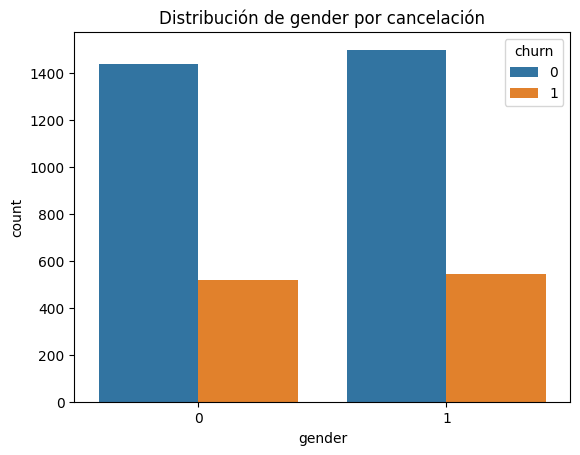

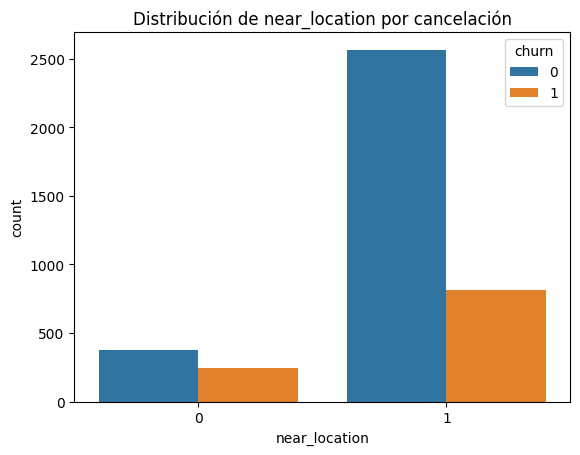

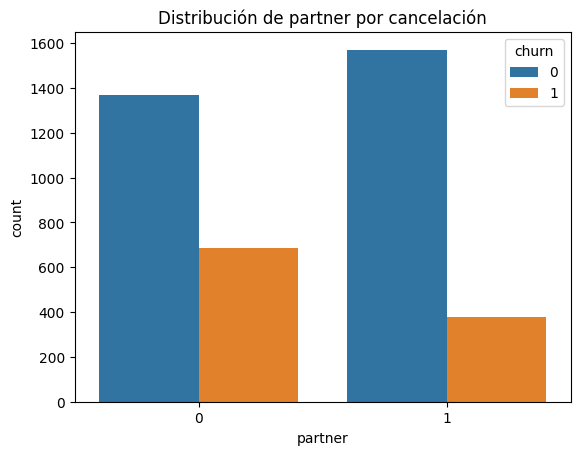

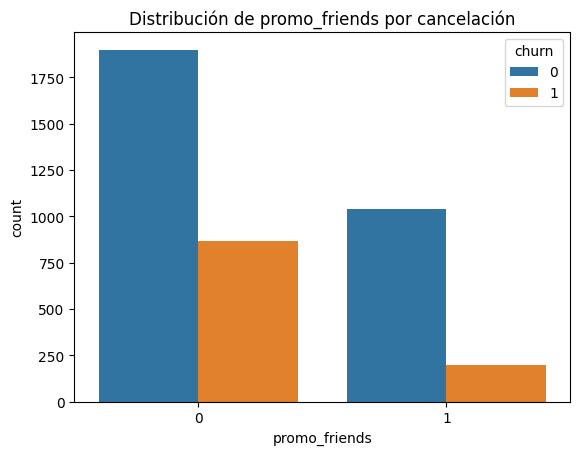

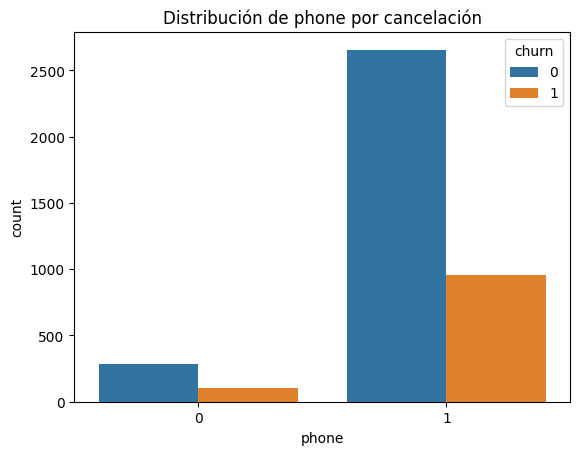

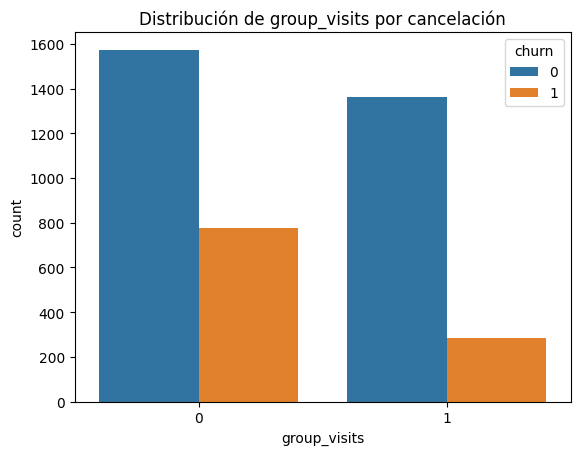

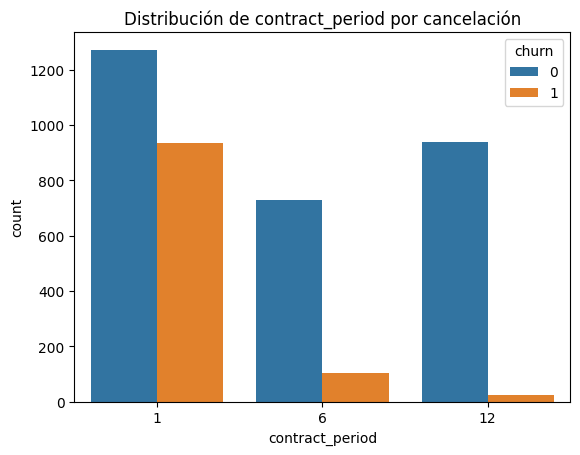

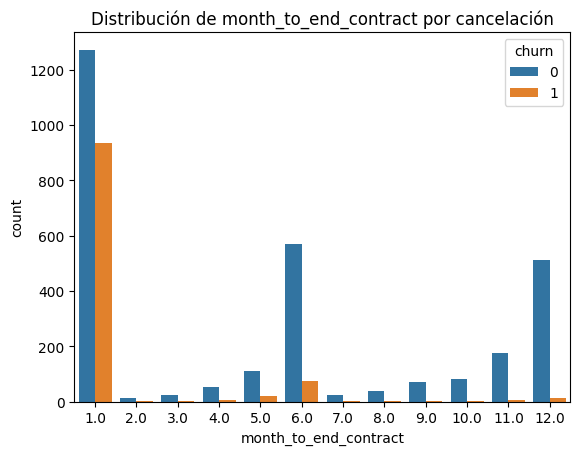

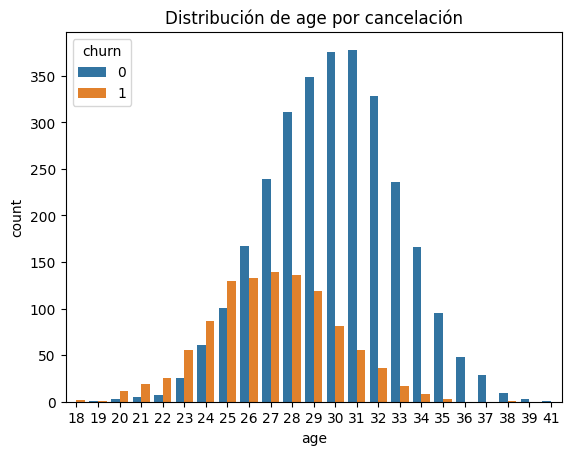

In [8]:
#creación de histogramas por cancelación
sns.countplot(x = "gender",hue = "churn", data = data)
plt.title("Distribución de gender por cancelación")
plt.show()

sns.countplot(x = "near_location",hue = "churn", data = data)
plt.title("Distribución de near_location por cancelación")
plt.show()

sns.countplot(x = "partner",hue = "churn", data = data)
plt.title("Distribución de partner por cancelación")
plt.show()

sns.countplot(x = "promo_friends",hue = "churn", data = data)
plt.title("Distribución de promo_friends por cancelación")
plt.show()

sns.countplot(x = "phone",hue = "churn", data = data)
plt.title("Distribución de phone por cancelación")
plt.show()

sns.countplot(x = "group_visits",hue = "churn", data = data)
plt.title("Distribución de group_visits por cancelación")
plt.show()

sns.countplot(x = "contract_period",hue = "churn", data = data)
plt.title("Distribución de contract_period por cancelación")
plt.show()

sns.countplot(x = "month_to_end_contract",hue = "churn", data = data)
plt.title("Distribución de month_to_end_contract por cancelación")
plt.show()

sns.countplot(x = "age",hue = "churn", data = data)
plt.title("Distribución de age por cancelación")
plt.show()

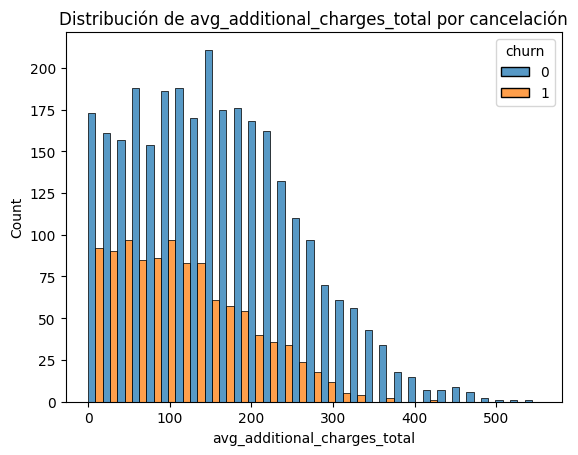

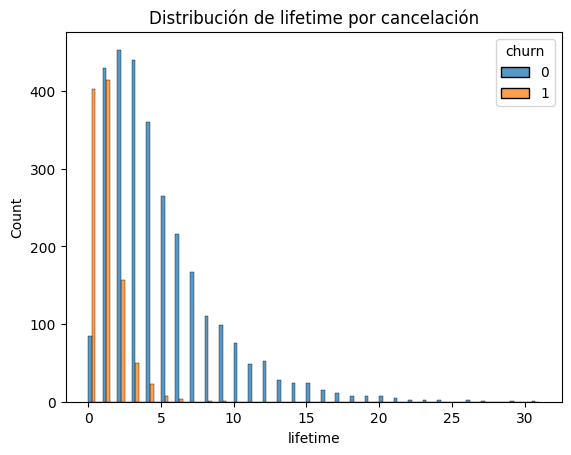

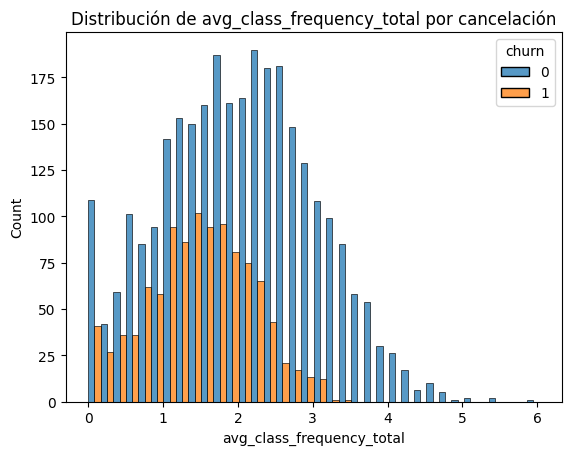

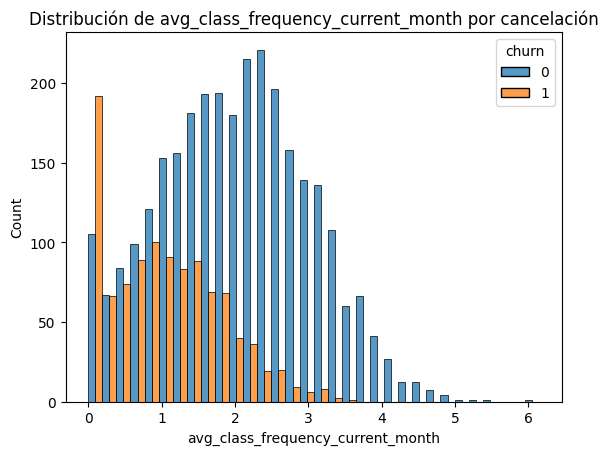

In [9]:
sns.histplot(x = "avg_additional_charges_total", hue = "churn", data = data, multiple = "dodge")
plt.title("Distribución de avg_additional_charges_total por cancelación")
plt.show()

sns.histplot(x = "lifetime", hue = "churn", data = data, multiple = "dodge")
plt.title("Distribución de lifetime por cancelación")
plt.show()

sns.histplot(x = "avg_class_frequency_total", hue = "churn", data = data, multiple = "dodge")
plt.title("Distribución de avg_class_frequency_total por cancelación")
plt.show()

sns.histplot(x = "avg_class_frequency_current_month", hue = "churn", data = data, multiple = "dodge")
plt.title("Distribución de avg_class_frequency_current_month por cancelación")
plt.show()

<div class="alert alert-block alert-info">
<b>Los gráficos han sido corregidos</b> <a class="tocSkip"></a>
</div>

*Crea una matriz de correlación y muéstrala.

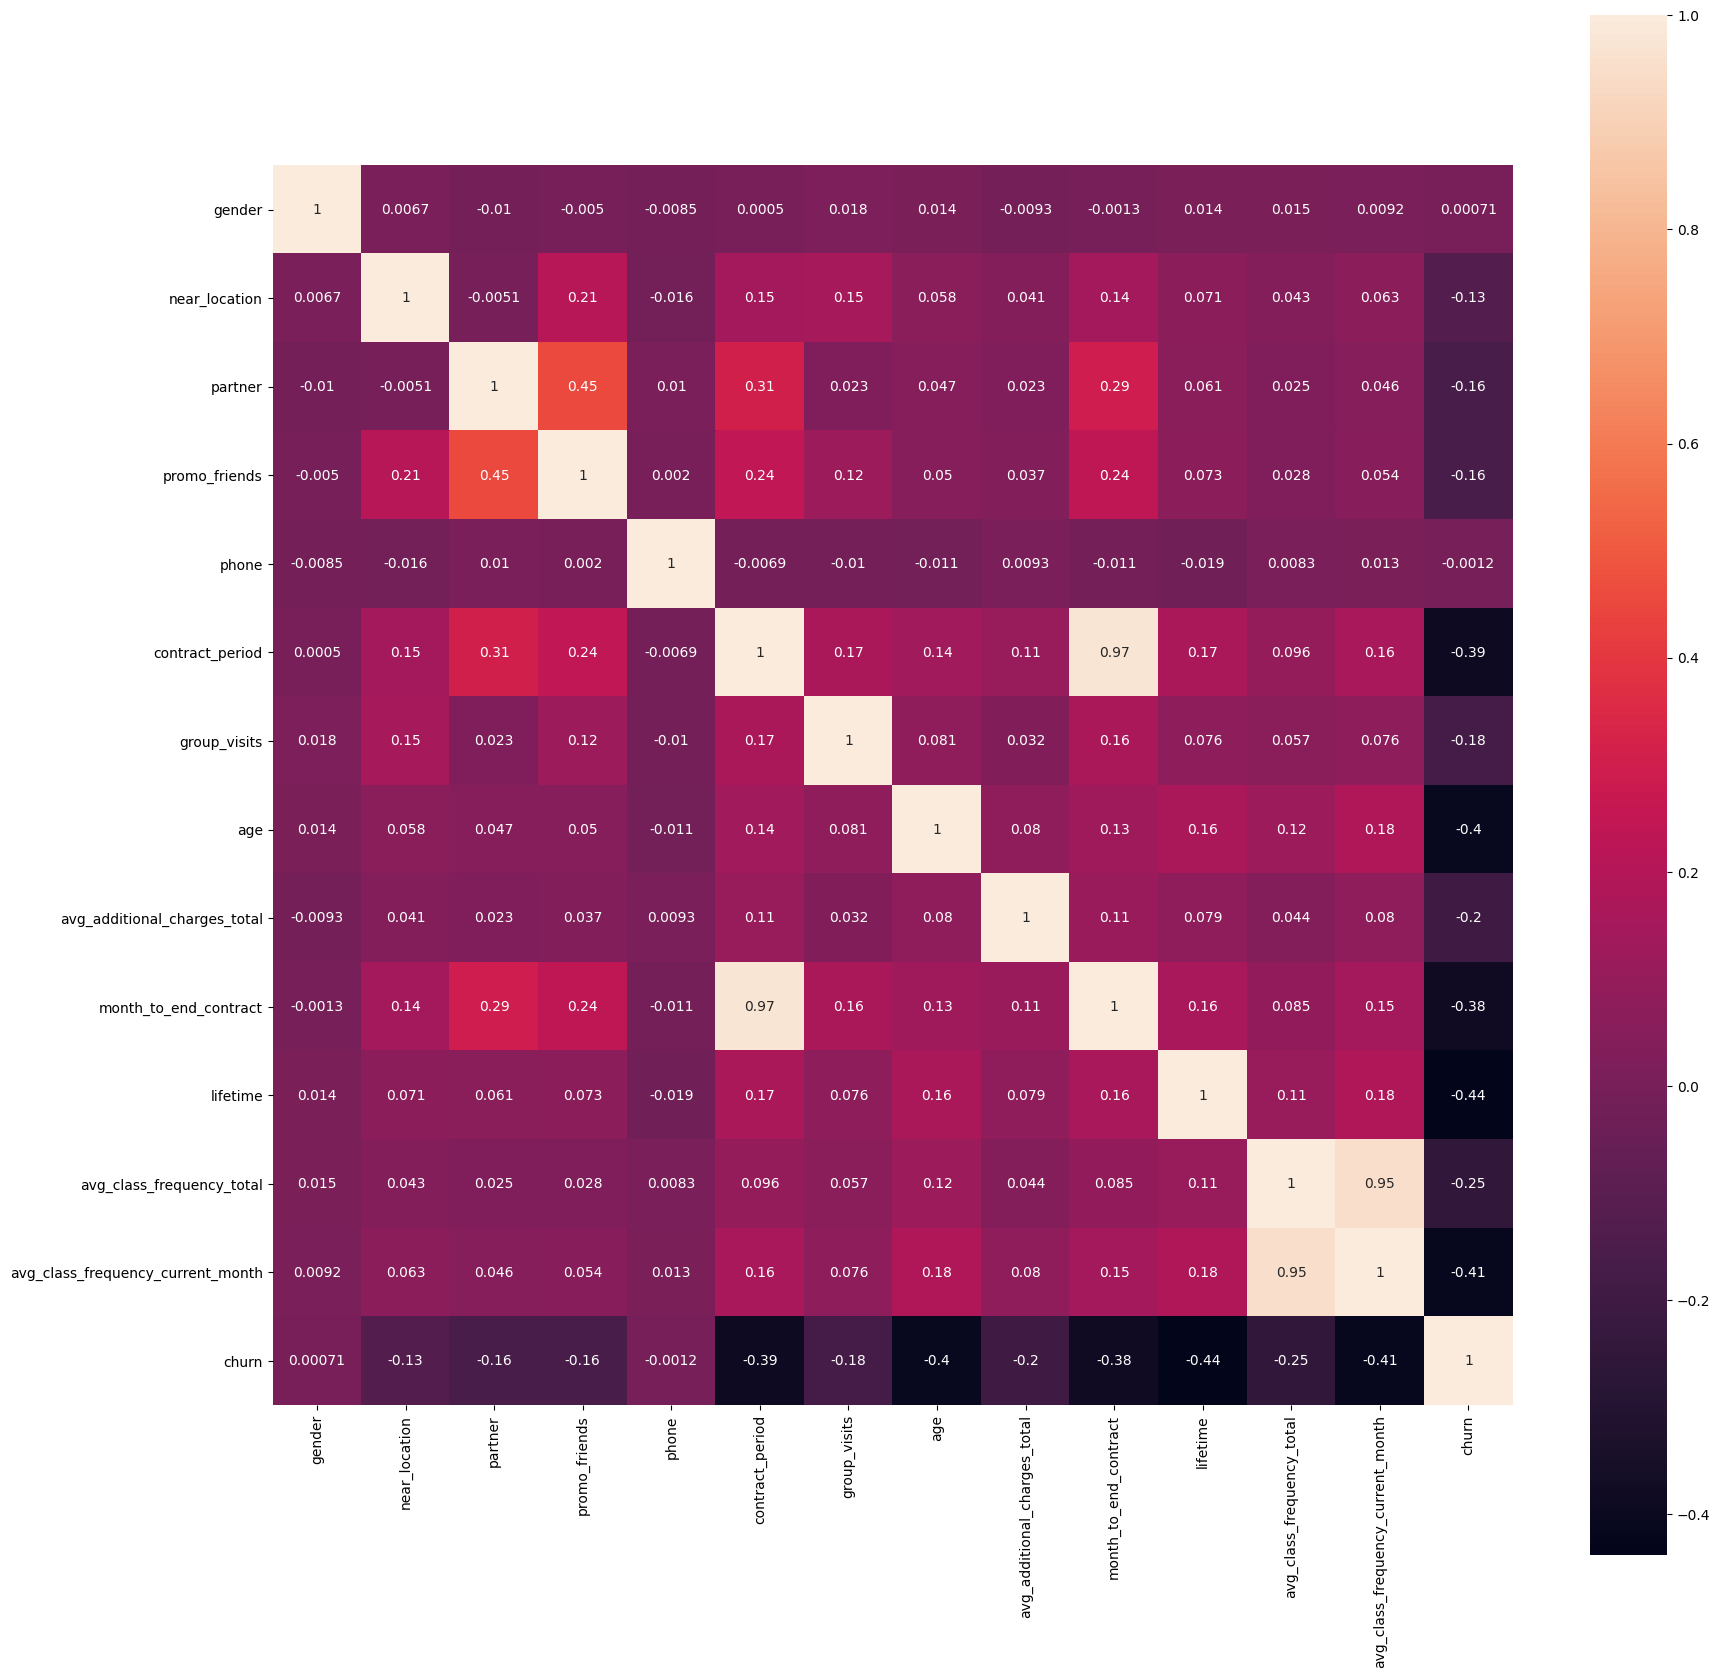

In [10]:
#matriz de correlación
corr_data = data.corr()

#mapa de calor
plt.figure(figsize = (20,20))
sns.heatmap(corr_data, square = True, annot = True)
plt.show()

## Paso 3. Construir un modelo para predecir la cancelación de usuarios
Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
Entrena el modelo en el set de entrenamiento con dos métodos:
regresión logística;
bosque aleatorio.
Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?
Recuerda indicar el parámetro random_state cuando dividas los datos y definas el algoritmo. 



In [11]:
# mira la relación entre las clases del dataset
print('La relación entre las clases:\n', data['churn'].value_counts())

La relación entre las clases:
 0    2939
1    1061
Name: churn, dtype: int64


In [12]:
# divide los datos en características (la matriz X) y una variable objetivo (y)
X = data.drop('churn', axis = 1)
y = data['churn']

# divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# define el algoritmo del modelo
model = LogisticRegression()

# entrena tu modelo
model.fit(X_train, y_train)

# utiliza el modelo entrenado para hacer previsiones
probabilities = model.predict_proba(X_test)[:,1]

# predicción binaria
predictions = model.predict(X_test)

# muestra todas las métricas estudiadas para la predicción resultante
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))


Exactitud: 0.92
Precisión: 0.87
Recall: 0.81
F1: 0.84


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# divide los datos en características (la matriz X) y una variable objetivo (y)
X = data.drop('churn', axis = 1)
y = data['churn']

# divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# define el algoritmo del modelo
model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# entrena tu modelo
model.fit(X_train, y_train)

# utiliza el modelo entrenado para hacer previsiones
probabilities = model.predict_proba(X_test)[:,1]

# predicción binaria
predictions = model.predict(X_test)

# muestra todas las métricas estudiadas para la predicción resultante
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Exactitud: 0.92
Precisión: 0.84
Recall: 0.82
F1: 0.83



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo. En un futuro podrás implementar optimización de hiperparámetros para mejorar las métricas de los modelos.
</div>

Los dos modelos proporcionan como resultado métricas similares. Globalmente se puede afirmar que ambas predicciones son muy buenas.

## Paso 4. Crear clústeres de usuarios/as
Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

- Estandariza los datos.

In [14]:
# Deja de lado la columna con datos sobre la cancelación (la matriz X) 
X = data.drop('churn', axis = 1)

#Estandariza los datos
sc = StandardScaler()
X_sc = sc.fit_transform(X)
print(X_sc)


[[ 0.97970588  0.42788074  1.02686062 ... -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   ...  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 ... -0.46008079 -0.02049263
  -0.02901851]
 ...
 [ 0.97970588  0.42788074  1.02686062 ... -0.46008079  0.93313947
   1.01103141]
 [-1.0207145   0.42788074  1.02686062 ... -0.19332863 -0.25604937
  -0.16225246]
 [ 0.97970588 -2.33709981  1.02686062 ... -0.72683295 -0.79947418
  -0.69509885]]


- Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.


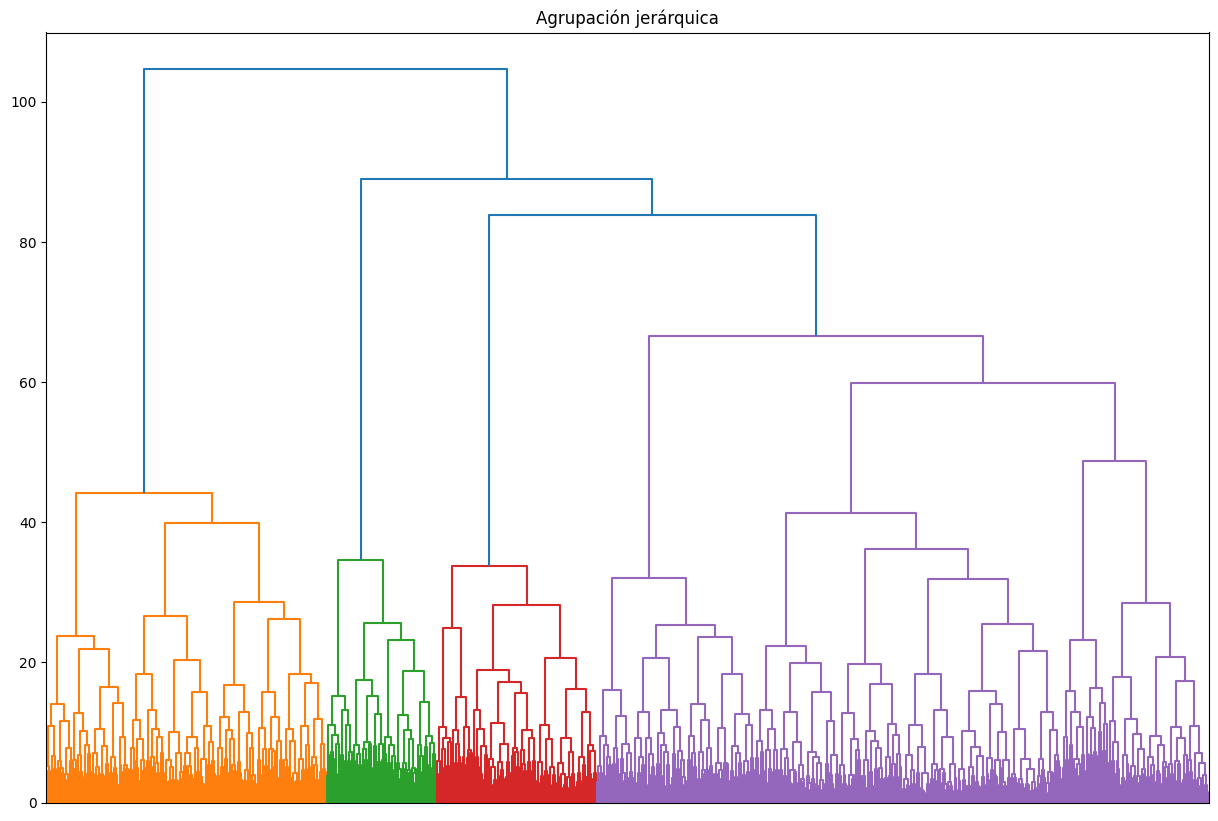

In [15]:
#uso de linked para crear el dendograma
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.xticks([])
plt.title('Agrupación jerárquica')
plt.show()

<div class="alert alert-block alert-info">
<b>El dendrograma han sido corregidos</b> <a class="tocSkip"></a>
</div>

- Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)


In [16]:
# lee los datos
print(X_sc.shape)

print(X_sc)

# define el modelo k_means con 6 clústeres por el dendograma anterior
km = KMeans(n_clusters = 6)
# predice los clústeres para las observaciones (el algoritmo les asigna un número de 0 a 4)
labels = km.fit_predict(X_sc)

# almacena etiquetas de clúster en el campo de nuestro conjunto de datos
data['cluster_km'] = labels

# obtiene las estadísticas de los valores medios de las características por clúster
data.groupby(['cluster_km']).mean()

print(data)



(4000, 13)
[[ 0.97970588  0.42788074  1.02686062 ... -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   ...  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 ... -0.46008079 -0.02049263
  -0.02901851]
 ...
 [ 0.97970588  0.42788074  1.02686062 ... -0.46008079  0.93313947
   1.01103141]
 [-1.0207145   0.42788074  1.02686062 ... -0.19332863 -0.25604937
  -0.16225246]
 [ 0.97970588 -2.33709981  1.02686062 ... -0.72683295 -0.79947418
  -0.69509885]]
      gender  near_location  partner  promo_friends  phone  contract_period  \
0          1              1        1              1      0                6   
1          0              1        0              0      1               12   
2          0              1        1              0      1                1   
3          0              1        1              1      1               12   
4          1              1        1              1      1                1   
...      ...           

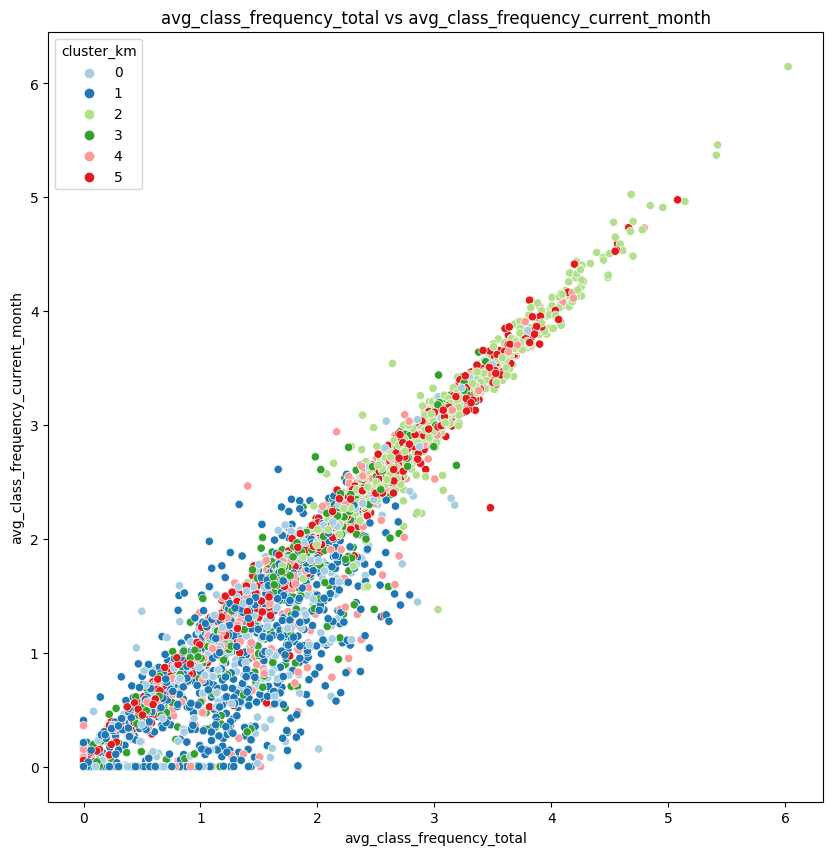

In [17]:
# define la función para representar gráficos de características pareadas para los clústeres
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()
    
# representa el gráfico para las características pareadas 
show_clusters_on_plot(data, 'avg_class_frequency_total','avg_class_frequency_current_month', 'cluster_km')


- Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?


In [18]:
print(data.groupby('cluster_km', as_index=False).mean())

   cluster_km    gender  near_location   partner  promo_friends     phone  \
0           0  0.495968       0.000000  0.469758       0.080645  1.000000   
1           1  0.486540       1.000000  0.239282       0.021934  1.000000   
2           2  0.583573       0.963977  0.269452       0.086455  0.998559   
3           3  0.487047       0.998273  0.825561       1.000000  1.000000   
4           4  0.522078       0.862338  0.470130       0.306494  0.000000   
5           5  0.497034       0.947805  0.744958       0.492289  1.000000   

   contract_period  group_visits        age  avg_additional_charges_total  \
0         2.288306      0.217742  28.445565                    134.251178   
1         1.999003      0.321037  28.212363                    130.821527   
2         2.766571      0.476945  30.158501                    165.941225   
3         3.101900      0.450777  29.127807                    140.738820   
4         4.787013      0.425974  29.301299                    143.957664  

- Traza distribuciones de características para los clústeres. ¿Notas algo?


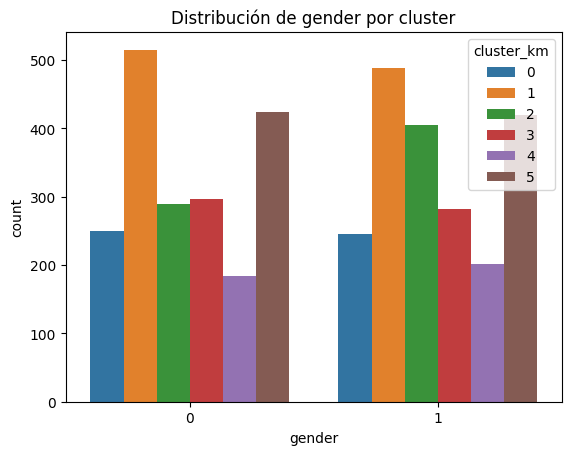

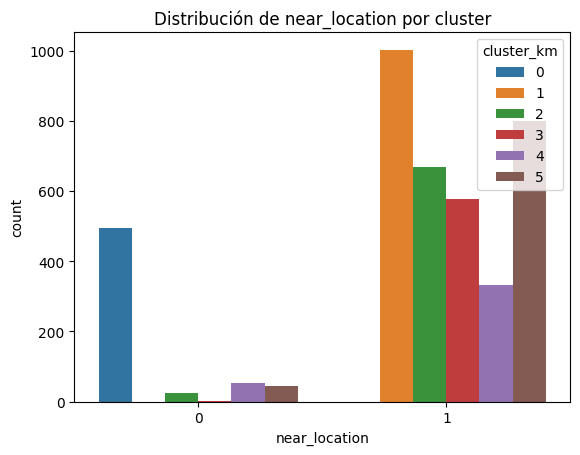

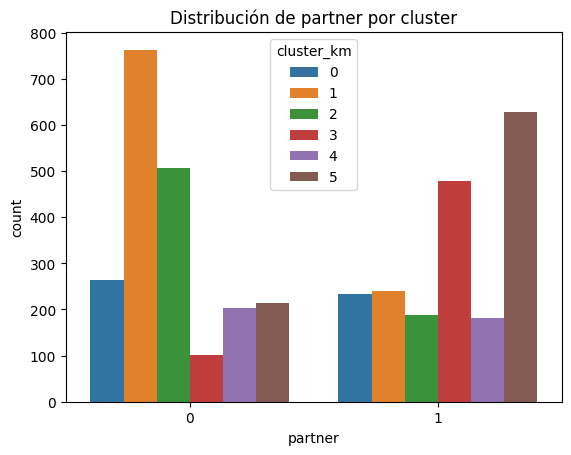

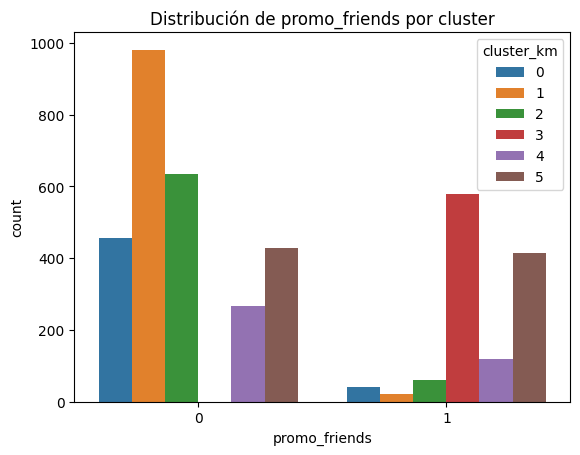

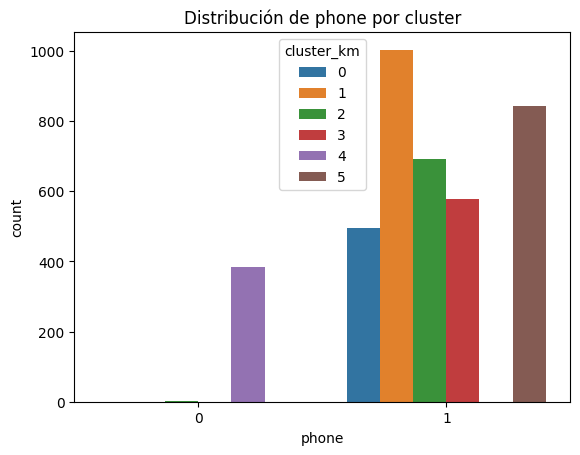

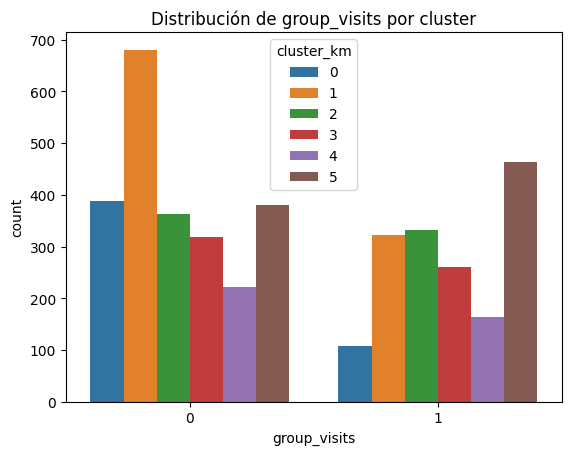

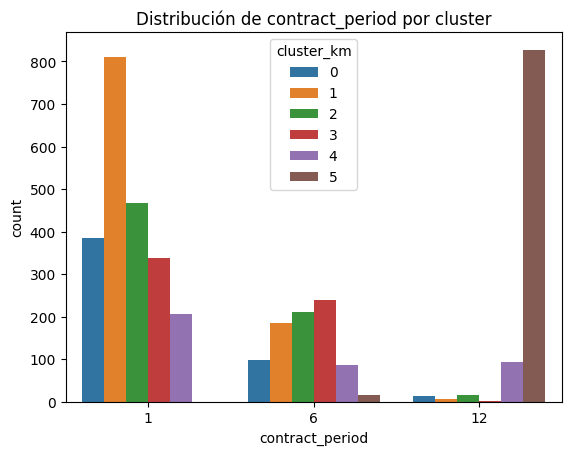

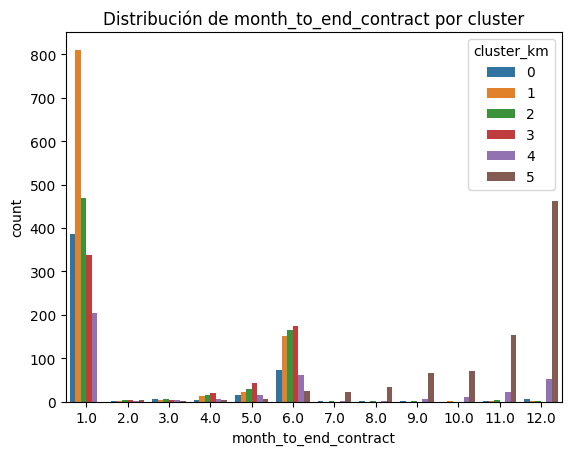

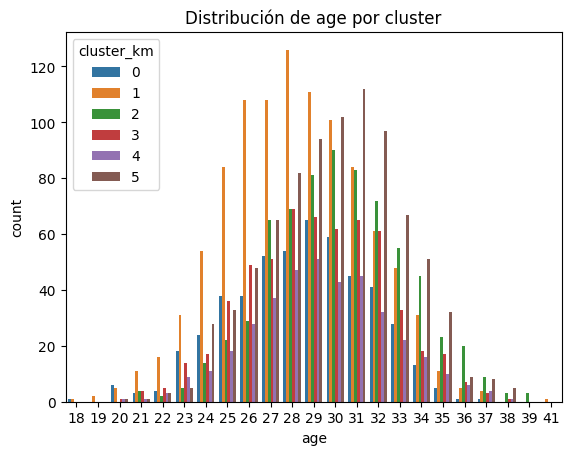

In [19]:
#creación de histogramas por cancelación
sns.countplot(x = "gender",hue = "cluster_km", data = data)
plt.title("Distribución de gender por cluster")
plt.show()

sns.countplot(x = "near_location",hue = "cluster_km", data = data)
plt.title("Distribución de near_location por cluster")
plt.show()

sns.countplot(x = "partner",hue = "cluster_km", data = data)
plt.title("Distribución de partner por cluster")
plt.show()

sns.countplot(x = "promo_friends",hue = "cluster_km", data = data)
plt.title("Distribución de promo_friends por cluster")
plt.show()

sns.countplot(x = "phone",hue = "cluster_km", data = data)
plt.title("Distribución de phone por cluster")
plt.show()

sns.countplot(x = "group_visits",hue = "cluster_km", data = data)
plt.title("Distribución de group_visits por cluster")
plt.show()

sns.countplot(x = "contract_period",hue = "cluster_km", data = data)
plt.title("Distribución de contract_period por cluster")
plt.show()

sns.countplot(x = "month_to_end_contract",hue = "cluster_km", data = data)
plt.title("Distribución de month_to_end_contract por cluster")
plt.show()

sns.countplot(x = "age",hue = "cluster_km", data = data)
sns.color_palette()
plt.title("Distribución de age por cluster")
plt.show()


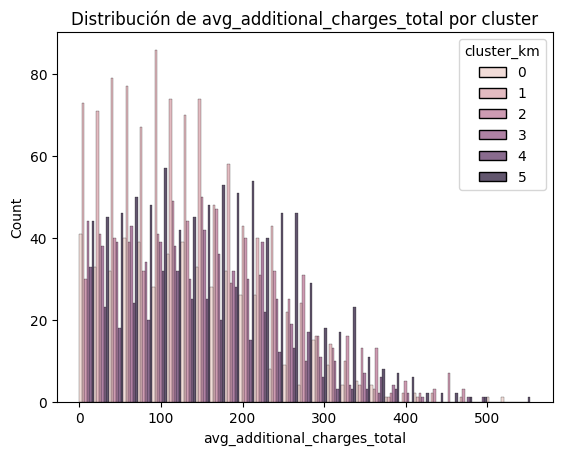

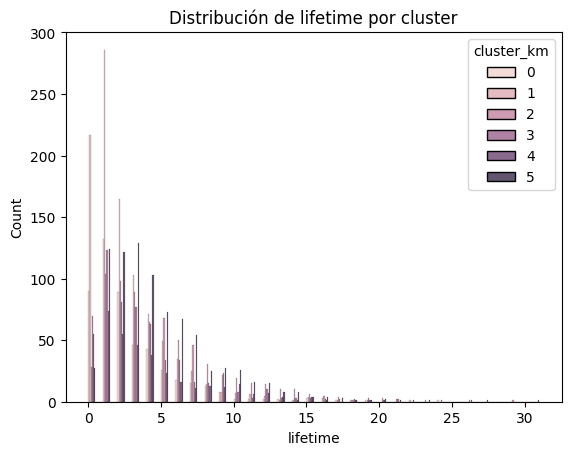

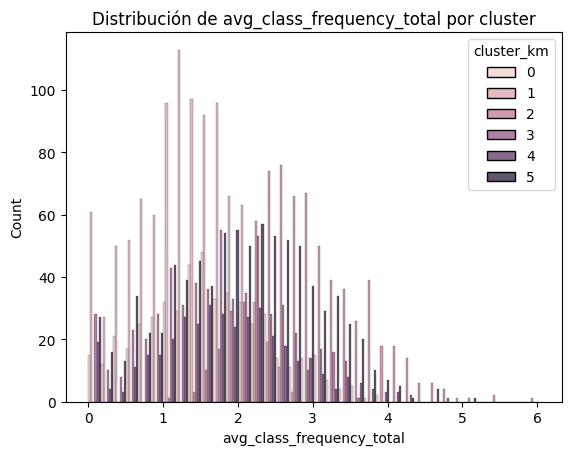

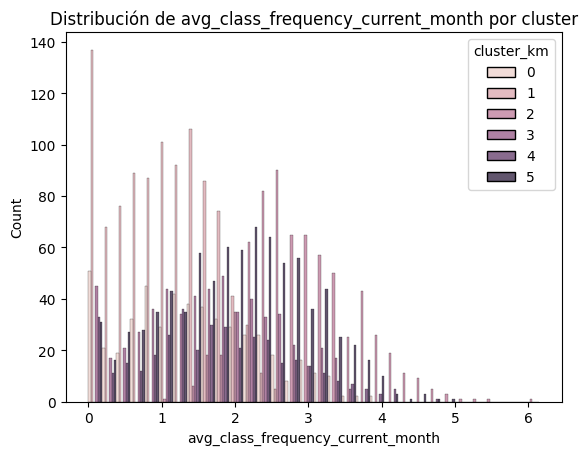

In [20]:
sns.histplot(x = "avg_additional_charges_total", hue = "cluster_km", data = data, multiple = "dodge")
sns.color_palette("flare")
plt.title("Distribución de avg_additional_charges_total por cluster")
plt.show()

sns.histplot(x = "lifetime", hue = "cluster_km", data = data, multiple = "dodge")
plt.title("Distribución de lifetime por cluster")
plt.show()

sns.histplot(x = "avg_class_frequency_total", hue = "cluster_km", data = data, multiple = "dodge")
plt.title("Distribución de avg_class_frequency_total por cluster")
plt.show()

sns.histplot(x = "avg_class_frequency_current_month", hue = "cluster_km", data = data, multiple = "dodge")
plt.title("Distribución de avg_class_frequency_current_month por cluster")
plt.show()

<div class="alert alert-block alert-info">
<b>Los gráficos han sido corregidos</b> <a class="tocSkip"></a>
</div>

- Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [21]:
cancel = pd.pivot_table(data, values='partner', index=['cluster_km'],
                       columns=['churn'], aggfunc="count")
cancel = cancel.reset_index()
cancel['%cancelacion'] = cancel[1] * 100 / (cancel[1]+cancel[0])
cancel['%cancelacion'] = cancel['%cancelacion'].round(2)
print(cancel)


churn  cluster_km    0    1  %cancelacion
0               0  272  224         45.16
1               1  478  525         52.34
2               2  649   45          6.48
3               3  433  146         25.22
4               4  282  103         26.75
5               5  825   18          2.14


<div class="alert alert-block alert-info">
<b> Caracteristicas más sobresalientes de cada cluster </b><br>
    
<b> Cluster 0: 
    Uno de los 2 géneros es mayoritario. 
    La mayoría vive cerca. 
    La mayoría no ha sido invitado por su compañía. 
    La minoría han sido invitados por sus amigos. 
    Todos han proporcionado su número de teléfono.
    Tienen periodos de contrato promedio de 2 meses. 
    Tiene un lifetime relativamente corto de 2 meses.
    La mayoría no participa en sesiones de grupo.
    Tiene un promedio de edad de 28 a 30 años.<br>
    Estrategia: Incentivar a las sesiones de grupo para alargar su tiempo de contrato
    </b><br>
    
<b> Cluster 1: 
    El número de personas de cada género es similar. 
    Todos viven cerca. 
    La mayoría ha sido invitado por su compañía. 
    La minoría han sido invitados por sus amigos. 
    Todos han proporcionado su número de teléfono. 
    Tienen periodos de contrato promedio de 2 meses.
    Tiene un lifetime relativamente corto de 2 meses.
    La mayoría no participa en sesiones de grupo.
    Tiene un promedio de edad de 28 a 30 años.
    Menor promedio de visistas mensuales. <br>
    Estrategia: Incentivar a las sesiones por grupo y al promo amigos
    </b><br>
    
<b> Cluster 2: 
    El número de personas de cada género es similar. 
    Todos viven cerca. La mayoría no ha sido invitado por su compañía. 
    La minoría han sido invitados por sus amigos. 
    Todos han proporcionado su número de teléfono. 
    Tienen periodos de contrato promedio de 2 meses.
    Tiene un lifetime relativamente corto de 5 meses. 
    Tiene un promedio de edad de 28 a 30 años.
    Su consumo adicional es más alto que los otros clusters.
    Tiene mayor promedio de visitas en el ultimo mes y todos los meses.<br>
    Estrategia: Incentivar con los referidos por compañías
    </b><br>
    
<b> Cluster 3: 
    El número de personas de cada género es similar. 
    Todos viven lejos. 
    Invitación por compañía es irrelevante. 
    Todos han sido invitados por amigos. 
    Todos han proporcionado su número de teléfono. 
    Tienen periodos de contrato de 1 y 6 meses.
    Tiene un lifetime relativamente corto de 3 meses. 
    Tiene un promedio de edad de 28 a 30 años. <br>
    Estrategia: Incentivar la invitación de amigos por mayor periodo de contrato
    </b><br>
    
<b> Cluster 4: 
    El número de personas de cada género es similar. 
    La mayoría vive cerca. 
    La mayoría ha sido invitado por su compañía. 
    La minoría han sido invitados por sus amigos. 
    Ninguna persona ha proporcionado su número de teléfono. 
    Tienen periodos de contrato de de 1 y 6 meses.
    Tiene un lifetime relativamente corto de 3 meses. 
    Tiene un promedio de edad de 28 a 30 años. <br>
    Estrategia:  Incentivar la invitación de amigos por mayor periodo de contrato
    </b><br>
    
<b> Cluster 5: 
    El número de personas de cada género es similar. 
    La mayoría vive cerca. 
    Invitación por compañía es irrelevante.
    La minoría han sido invitados por amigos. 
    Todos han proporcionado su número de teléfono. 
    Tienen periodos de contrato de 12 meses. 
    Tiene un lifetime relativamente corto de 4 meses. 
    Tiene un promedio de edad de 28 a 30 años.
    Su consumo adicional es más alto que los otros clusters.
    Tienen contratos más largos que los otros clusters.
    Tiene mayor promedio de visitas en el ultimo mes y todos los meses. <br>
    Estrategia: Dar beneficios a sesiones grupales para alargar contratos al siguiente año
    </b><br>

    <a class="tocSkip"></a>
</div>

## Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes
Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.

No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.

Los grupos más propensos en cancelar son los clusteres 0, 2 y 5. 
Las caracteríticas más relevantes según los datos se listan aquí:
* El grupo 2 se compone al 100% de un género y el 5 del otro género
* Todos los grupos viven cerca, excepto el grupo 0 que vive lejos
* La invitación por su compañía, visita por grupos, el gasto adicional y la edad son variables irrelevantes en los grupos ya que tienen valores similares entre los grupos
* El grupo 0, 2 y 5 no fue invitado por amigos
* Los tres grupos dieron su número de teléfono
* Los tres grupos tienen en promedio un contrato entre 1 y 6 meses
* El lifetime de los tres grupos es de 3 meses
* hay que tomar en cuenta al grupo 4: viven cerca, fueron invitados por su compañía, tienen contratos más largos

En base a este análisis se recomienda:
- Incrementar beneficios a las personas que son invitadas por amigos
- Dar beneficios a las personas que viven lejos dentro de un radio específico
- Dar facilidad de horarios




<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, Andrés. Nos quedan algunos elementos por resolver antes de poder aprobar tu proyecto. He dejado comentarios a lo largo del documnento para ello.
</div>


<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo, Andrés. Todo ha sido corregido y has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>